# 対応のないT検定(ウェルチ)
用途としては違う集団で似た性質か違う性質かを検定する。今回は機械学習用データセットで異なるクラスでどのようになるかを検定して分布を確認する。具体的にはデータセットのクラスごとに有意確率を求めてクラスごとに特徴量の分布の違いの度合いを計算する。ここで、特徴量はp値の値が低いほど異なる分布をしていると考えられる。

また、正規分布を使用してp値によって分布の違いを可視化してどの程度違うかを確認する。

## ライブラリのインポート

In [1]:
import pandas as pd
import scipy.stats as stats
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み

In [2]:
df=pd.read_csv("iris.csv")
df0=df[df["category"]==0]
df1=df[df["category"]==1]
df2=df[df["category"]==2]

## カテゴリごとにt検定を行いp値の算出と正規分布による可視化

カテゴリ0とカテゴリ1の比較
項目名:sepal length (cm)
p値:8.985235037487077e-18
平均値の差:0.9299999999999997
差の標準偏差-0.08839475466938762



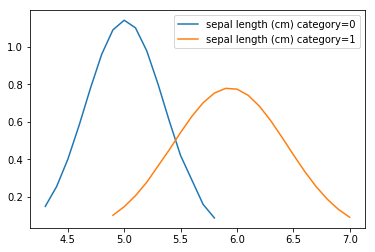

項目名:sepal width (cm)
p値:4.362239016010214e-15
平均値の差:0.6479999999999997
差の標準偏差0.06980673027607534



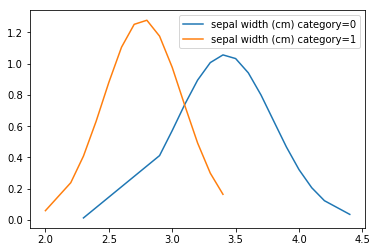

項目名:petal length (cm)
p値:5.717463758170621e-62
平均値の差:2.796
差の標準偏差-0.0708410119887614



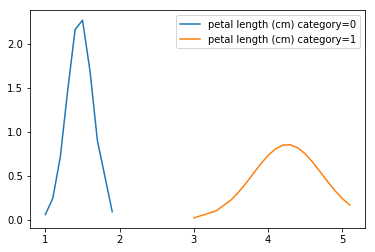

項目名:petal width (cm)
p値:4.589080615710866e-56
平均値の差:1.0819999999999999
差の標準偏差-0.03181194744117374



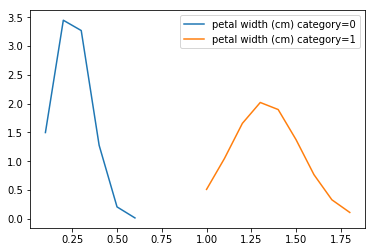

In [3]:
print("カテゴリ0とカテゴリ1の比較")
for col in df.columns:
    if col != "category":
        x0=df0[col].values
        x1=df1[col].values
        t,p=stats.ttest_ind(x0,x1)
        MU=abs(x0.mean()-x1.mean())
        SE=MU/t
        DF=len(x0)-1+len(x1)-1
        CI=stats.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )
        print("項目名:"+col)
        print("p値:"+str(p))
        print("平均値の差:"+str(MU))
        print("差の標準偏差"+str(SE))
        print()
        ave0 = np.mean(x0)
        ave1 = np.mean(x1)
        var0 = np.var(x0)
        var1 = np.var(x1)
        y0 = stats.norm.pdf(x=np.sort(x0), loc=ave0, scale=np.sqrt(var0))
        y1 = stats.norm.pdf(x=np.sort(x1), loc=ave1, scale=np.sqrt(var1))
        plt.plot(np.sort(x0), y0, label=col+" category=0")
        plt.plot(np.sort(x1), y1, label=col+" category=1")
        plt.legend()
        plt.show()

カテゴリ1とカテゴリ2の比較
項目名:sepal length (cm)
p値:1.7248563024547942e-07
平均値の差:0.6519999999999984
差の標準偏差-0.11582534353103226



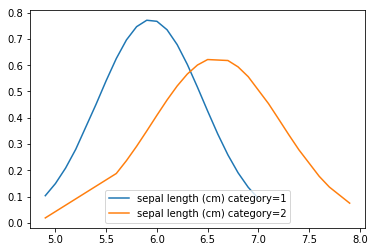

項目名:sepal width (cm)
p値:0.0018191004238894803
平均値の差:0.20399999999999974
差の標準偏差-0.06363544128671618



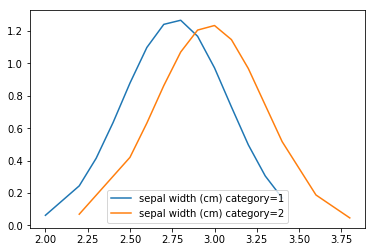

項目名:petal length (cm)
p値:3.1788195478061495e-22
平均値の差:1.2920000000000007
差の標準偏差-0.10250893440404629



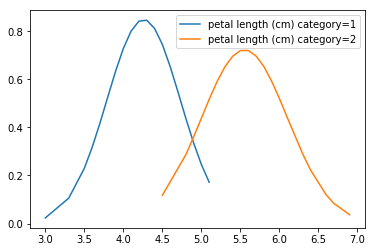

項目名:petal width (cm)
p値:2.2304090710248333e-26
平均値の差:0.7000000000000004
差の標準偏差-0.047862046657075594



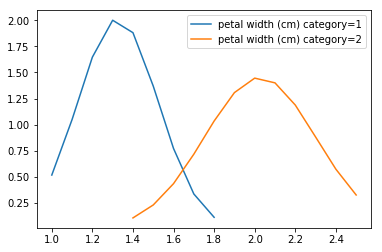

In [4]:
print("カテゴリ1とカテゴリ2の比較")
for col in df.columns:
    if col != "category":
        x1=df1[col].values
        x2=df2[col].values
        t,p=stats.ttest_ind(x1,x2)
        MU=abs(x1.mean()-x2.mean())
        SE=MU/t
        DF=len(x1)-1+len(x2)-1
        CI=stats.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )
        print("項目名:"+col)
        print("p値:"+str(p))
        print("平均値の差:"+str(MU))
        print("差の標準偏差"+str(SE))
        print()
        ave1 = np.mean(x1)
        ave2 = np.mean(x2)
        var1 = np.var(x1, ddof=1)
        var2 = np.var(x2, ddof=1)
        y1 = stats.norm.pdf(x=np.sort(x1), loc=ave1, scale=np.sqrt(var1))
        y2 = stats.norm.pdf(x=np.sort(x2), loc=ave2, scale=np.sqrt(var2))
        plt.plot(np.sort(x1), y1, label=col+" category=1")
        plt.plot(np.sort(x2), y2, label=col+" category=2")
        plt.legend()
        plt.show()

カテゴリ2とカテゴリ0の比較
項目名:sepal length (cm)
p値:6.892546060674059e-28
平均値の差:1.581999999999998
差の標準偏差0.10281943753344443



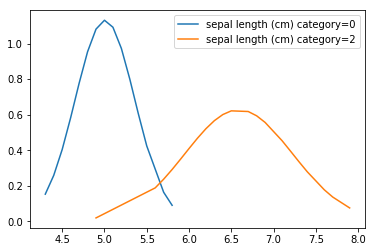

項目名:sepal width (cm)
p値:8.916634067006443e-09
平均値の差:0.44399999999999995
差の標準偏差-0.07059513771774764



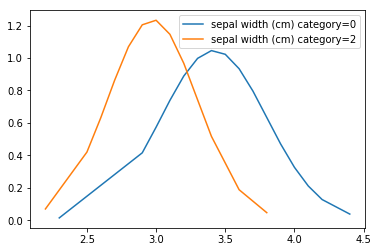

項目名:petal length (cm)
p値:1.5641224158883576e-71
平均値の差:4.088000000000001
差の標準偏差0.08181612036157916



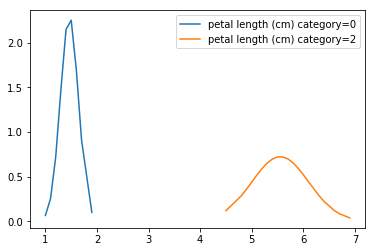

項目名:petal width (cm)
p値:3.582719502316063e-65
平均値の差:1.7820000000000003
差の標準偏差0.04169569057162739



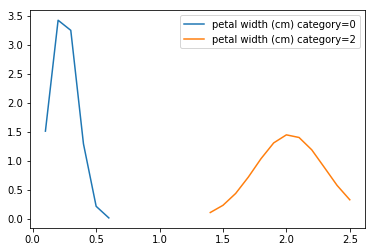

In [5]:
print("カテゴリ2とカテゴリ0の比較")
for col in df.columns:
    if col != "category":
        x2=df2[col].values
        x0=df0[col].values
        t,p=stats.ttest_ind(x2,x0)
        MU=abs(x2.mean()-x0.mean())
        SE=MU/t
        DF=len(x2)-1+len(x0)-1
        CI=stats.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )
        print("項目名:"+col)
        print("p値:"+str(p))
        print("平均値の差:"+str(MU))
        print("差の標準偏差"+str(SE))
        print()
        ave0 = np.mean(x0)
        ave2 = np.mean(x2)
        var0 = np.var(x0, ddof=1)
        var2 = np.var(x2, ddof=1)
        y0 = stats.norm.pdf(x=np.sort(x0), loc=ave0, scale=np.sqrt(var0))
        y2 = stats.norm.pdf(x=np.sort(x2), loc=ave2, scale=np.sqrt(var2))
        plt.plot(np.sort(x0), y0, label=col+" category=0")
        plt.plot(np.sort(x2), y2, label=col+" category=2")
        plt.legend()
        plt.show()